#                              Projet Détection de Fraude dans les cartes bancaires
#### LAHSIKI Walid - BOUKHDIMI Meriem

# Sommaire
### I - Compréhension du Métier
### II - Nettoyafe et prétraitement de données
### III - Analyse exploratoire de données (EDA)
### IV - Resoudre d'imbalance de données
### V - Data processing
### VI - Selection de model
### VII - Hyperparameter tunin
### VIII - Evaluation du model
### CONCLUSION

## I-Compréhension du Métier

### Contexte de l'Étude
On va creer un model qui va détecter si une transaction est un paiement normal ou une fraude. Comme décrit dans l'ensemble de données, les caractéristiques sont mises à l'échelle et les noms des caractéristiques ne sont pas montrés pour des raisons de confidentialité.


### Description des Données
Les caractéristiques V1 à V28 sont issues de PCA, 'Time' représente les secondes écoulées depuis la première transaction, 'Amount' est le montant de la transaction, et 'Class' est la variable cible (1 pour fraude, 0 sinon).
        

## II-Nettoyage et Prétraitement des Données

### Chargement des Données

In [5]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Chargement des données
chemin_donnees = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(chemin_donnees)
# Affichage des 5 premières lignes
df.head(5)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [6]:
df.shape

(284807, 31)

In [7]:
# Affichage des colonnes
df.columns
   

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# Affichage des informations sur les données
df.info()
# Affichage des statistiques descriptives
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

### Vérification des Valeurs Manquantes

In [9]:
# Affichage des valeurs manquantes
df.isnull().sum().max()


0

In [10]:
# Affichage des valeurs uniques
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

### Valeurs dupliqués

In [11]:
# Affichage des valeurs dupliquées
df.duplicated().sum()


1081

## III- Analyse exploratoire des données EDA

### La Distribution de valeurs pour la target

In [12]:
# Affichage des valeurs de la variable cible
df['Class'].unique()

array([0, 1])

In [10]:
# Le nombre de valeurs de la variable cible
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Text(0.5, 1.0, 'Class Distributions \n (0: Fraude vs 1: Non Fraude)')

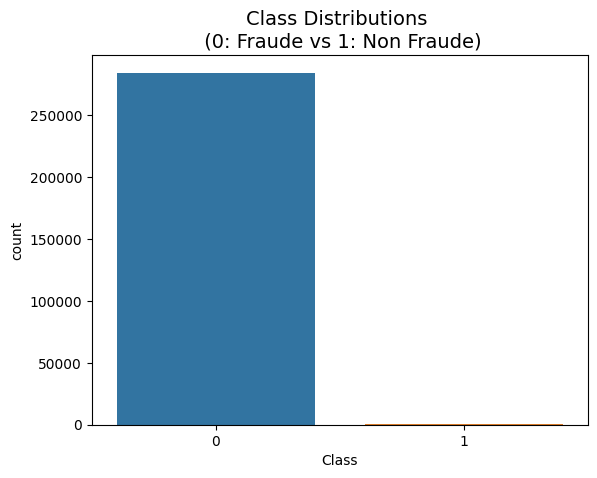

In [14]:
# Affichage des valeurs de la variable cible
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: Fraude vs 1: Non Fraude)', fontsize=14)

### La distribution pour autres features: Time, Amount

/tmp/ipykernel_43/3618214043.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: title={'center': 'Distribution de la variable Amount'}, xlabel='Amount', ylabel='Density'>

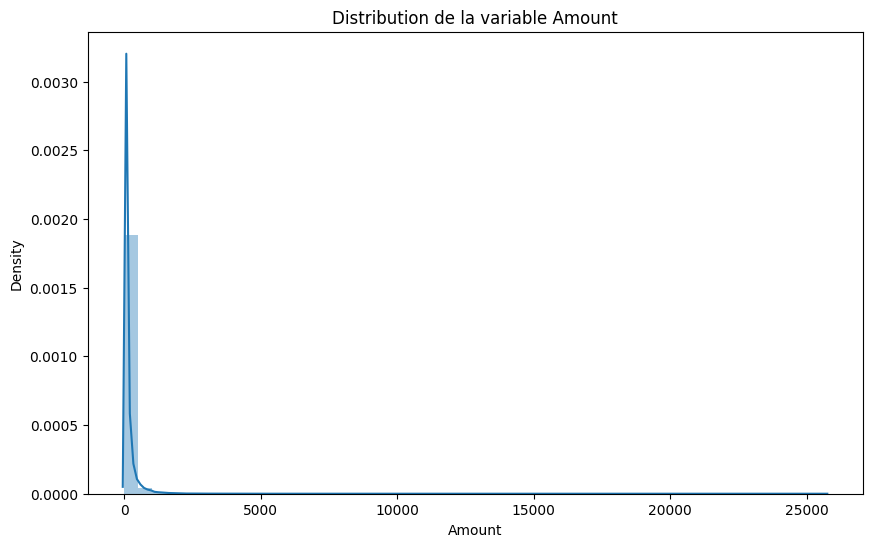

In [15]:
# Affichage de la distribution de la variable Amount
plt.figure(figsize=(10,6))
plt.title('Distribution de la variable Amount')
sns.distplot(df['Amount'])


In [16]:
# Affichage de la distribution de la variable Time
plt.figure(figsize=(10,6))
plt.title('Distribution de la variable Time')
sns.distplot(df['Time'])


/tmp/ipykernel_43/3475253503.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: title={'center': 'Distribution de la variable Time'}, xlabel='Time', ylabel='Density'>

<h3>Résumé: </h3>
<ul>
<li>Le montant de la transaction est relativement <b>petit</b>. La moyenne de toutes les montures réalisées est d'environ 88 USD. </li>
<li>Il n'y a pas de valeurs <b>"Null"</b>, nous n'avons donc pas besoin de chercher des moyens de remplacer les valeurs. </li>
<li> La plupart des transactions étaient <b>non frauduleuses</b> (99,83 %) du temps, tandis que des transactions <b>fraudes</b> se produisent (0,17 %) du temps dans la trame de données. </li>
</ul>

## IV-Creer une dataset des données egalement distribués 50/50 pour éviter le bias de notre model
Plusieurs approches existent, et dans notre cas on va utliser le <b> Random under sampling </b> (d'autres approches alternatives existent comme le <b> oversampling </b> c'est à dire faire l'inverse et créer un ensemble de données synthetiques pour les frauduleux pour achever l'équilibre, on se focalise dans notre étude sur la premiere)
### IV-a Scaling et distribution des features
<a id="distributing"></a>
Dans cette phase, nous allons d'abord mettre à l'échelle les colonnes composées de <b>Time</b> et <b>Amount </b>. Le temps et le montant doivent être mis à l’échelle comme les autres colonnes. D'un autre côté, nous devons également créer un sous-échantillon de la base de données afin d'avoir un nombre égal de cas de fraude et de non-fraude, aidant ainsi nos algorithmes à mieux comprendre les modèles qui déterminent si une transaction est une fraude ou non.

<h4> Pourquoi créons-nous un sous-échantillon ?</h4>
Au début, nous avons vu que la trame de données originale était fortement déséquilibrée ! L'utilisation du dataframe d'origine entraînera les problèmes suivants :
<ul>
<li><b>Surapprentissage : </b>Nos modèles de classification supposeront que dans la plupart des cas, il n'y a pas de fraude ! Ce que nous voulons pour notre modèle, c'est être certain lorsqu'une fraude se produit. </li>
<li><b>Corrélations erronées :</b> bien que nous ne sachions pas ce que signifient les caractéristiques "V", il sera utile de comprendre comment chacune de ces caractéristiques influence le résultat (fraude ou non-fraude) en ayant une trame de données déséquilibrée, nous ne sommes pas en mesure de voir les véritables corrélations entre la classe et les fonctionnalités. </li>
</ul>

<h4>Résumé: </h4>
<ul>
<li> <b>scaled amount </b> et <b> scaled time </b> sont les colonnes avec des valeurs mises à l'échelle. </li>
<li> Il y a <b>492 cas </b> de fraude dans notre ensemble de données, nous pouvons donc obtenir au hasard 492 cas de non-fraude pour créer notre nouveau sous-cadre de données. </li>
<li>Nous concaténons les 492 cas de fraude et de non-fraude, <b>créant un nouveau sous-échantillon. </b></li>
</ul>

In [17]:
# scale time and amout columns
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# inserer scaled amount et scaled time au debut du dataframe
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
df.head()


scaled_amount  scaled_time  Time        V1        V2        V3        V4  \
0       1.783274    -0.994983   0.0 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983   0.0  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972   1.0 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972   1.0 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960   2.0 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7  ...       V21       V22       V23       V24  \
0 -0.338321  0.462388  0.239599  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.060018 -0.082361 -0.078803  ... -0.225775 -0.638672  0.101288 -0.339846   
2 -0.503198  1.800499  0.791461  ...  0.247998  0.771679  0.909412 -0.689281   
3 -0.010309  1.247203  0.237609  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.407193  0.095921  0.592941  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 33 columns]

### IV-b Fractionnement des données (DataFrame d'origine)
<a id="splitting"></a>
Avant de procéder à la <b> Random under sampling </b>, nous devons séparer la trame de données d'origine. nous souhaitons tester nos modèles sur l'ensemble de test d'origine et non sur l'ensemble de test créé par l'une ou l'autre de ces techniques.


In [18]:
from sklearn.model_selection import StratifiedKFold

# Afficher le pourcentage de non-fraudes et de fraudes dans l'ensemble de données
print('Non Fraudes', round(df['Class'].value_counts(normalize=True)[0] * 100,2), '% de l\'ensemble de données')
print('Fraudes', round(df['Class'].value_counts(normalize=True)[1] * 100, 2), '% de l\'ensemble de données')

# Séparer les caractéristiques (X) des étiquettes (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Utiliser StratifiedKFold pour diviser les données en ensembles d'entraînement et de test
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Entraînement:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Vérifier la distribution des étiquettes
train_counts = original_ytrain.value_counts(normalize=True)
test_counts = original_ytest.value_counts(normalize=True)

print('-' * 100)
print('Distributions des étiquettes : \n')
print(train_counts)
print(test_counts)

Non Fraudes 99.83 % de l'ensemble de données
Fraudes 0.17 % de l'ensemble de données
Entraînement: [     0      1      2 ... 284803 284804 284806] Test: [    13     18     20 ... 284787 284797 284805]
Entraînement: [     1      2      3 ... 284804 284805 284806] Test: [     0      4      8 ... 284793 284799 284803]
Entraînement: [     0      1      3 ... 284804 284805 284806] Test: [     2      6     16 ... 284771 284779 284788]
Entraînement: [     0      2      4 ... 284799 284803 284805] Test: [     1      3      7 ... 284802 284804 284806]
Entraînement: [     0      1      2 ... 284804 284805 284806] Test: [     5      9     29 ... 284794 284795 284798]
----------------------------------------------------------------------------------------------------
Distributions des étiquettes : 

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


### IV-c Implementation: <b> Random Under sampling </b>

In [19]:
# mélanger les données
df = df.sample(frac=1)

# sélectionner tous les lignes fraude
fraud_df = df.loc[df['Class'] == 1]

# aléatoirement sélectionner 492 lignes non-fraude (équivalent au nombre de lignes fraude)
non_fraud_df = df.loc[df['Class'] == 0].sample(n=len(fraud_df))

# combiner les deux dataframes
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# mélanger les lignes
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

scaled_amount  scaled_time     Time        V1        V2         V3  \
128774      -0.272480    -0.068833  78833.0 -0.340533  0.917389   1.194737   
114271      -0.077133    -0.132567  73408.0 -2.869795  1.335667  -1.009530   
39489        2.303920    -0.526733  39857.0  0.998807 -1.421044   0.976360   
142405      -0.135401     0.000023  84694.0 -4.868108  1.264420  -5.167885   
150654      -0.307273     0.107403  93834.0 -3.765680  5.890735 -10.202268   

               V4        V5        V6         V7  ...       V21       V22  \
128774   0.049024  0.875979  0.209428   0.828489  ...  0.001941  0.087263   
114271   1.693885 -0.741480 -0.796773  -2.614242  ...  0.528421  0.228027   
39489   -0.192961 -1.849060 -0.291716  -0.928178  ...  0.101282  0.033475   
142405   3.193648 -3.045621 -2.096166  -6.445610  ...  1.269205  0.057657   
150654  10.259036 -5.611448 -3.235376 -10.632683  ...  2.245606  0.546321   

             V23       V24       V25       V26       V27       V28  Amount  \
128774 -0.316321 -0.867073 -0.165641 -0.517314 -0.154905 -0.088017    2.50   
114271 -0.749298 -0.067179  0.215792 -0.453651  0.349191  0.198862   16.48   
39489  -0.141823  0.399560  0.295238 -0.260307  0.016097  0.054512  186.88   
142405  0.629307 -0.168432  0.443744  0.276539  1.441274 -0.127944   12.31   
150654  0.381853  0.382025 -0.821036  0.394355  1.412961  0.782407    0.01   

        Class  
128774      0  
114271      1  
39489       0  
142405      1  
150654      1  

[5 rows x 33 columns]

In [21]:
#visualiser la distribution des classes
sns.countplot(x='Class', data=new_df)
plt.title('Distribution des classes \n (0: Non Fraude vs 1: Fraude)', fontsize=14)

Text(0.5, 1.0, 'Distribution des classes \n (0: Non Fraude vs 1: Fraude)')

## V- Data processing

In [22]:
# trouver la corrélation entre les variables
corr = new_df.corr()
corr_negative = corr['Class'].sort_values(ascending=False).head(10) 
corr_positive = corr['Class'].sort_values(ascending=False).tail(10)
print(corr_negative)
print(corr_positive)

Class    1.000000
V4       0.710591
V11      0.684448
V2       0.489849
V19      0.245127
V20      0.168089
V21      0.128876
V27      0.087601
V26      0.078257
V28      0.076241
Name: Class, dtype: float64
V1    -0.424309
V18   -0.471291
V7    -0.476766
V9    -0.551673
V17   -0.560892
V3    -0.563322
V16   -0.590638
V10   -0.622702
V12   -0.684494
V14   -0.747254
Name: Class, dtype: float64


## Résumé:
<ul>
<li><b>Corrélations négatives : </b>V17, V14, V12 et V10 sont corrélées négativement. plus ces valeurs sont basses, plus le résultat final est susceptible d'être une transaction frauduleuse. </li>
<li> <b> Corrélations positives : </b> V2, V4, V11 et V19 sont positivement corrélés. plus ces valeurs sont élevées, plus le résultat final est susceptible d'être une transaction frauduleuse. </li>
</ul>

In [23]:
# creer une fonction pour afficher les matrices de corrélation
def plot_corr(df, ax, title):
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
    ax.set_title(title, fontsize=14)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

plot_corr(df, ax1, "Matrice de Corrélation Déséquilibrée \n (à ne pas utiliser comme référence)")
plot_corr(new_df, ax2, 'Matrice de Corrélation Sous-échantillon \n (utiliser comme référence)')

plt.show()


<li> <b>BoxPlots : </b> Nous utiliserons des boxplots pour mieux comprendre la distribution de ces caractéristiques dans les transactions frauduleuses et non frauduleuses. </li>

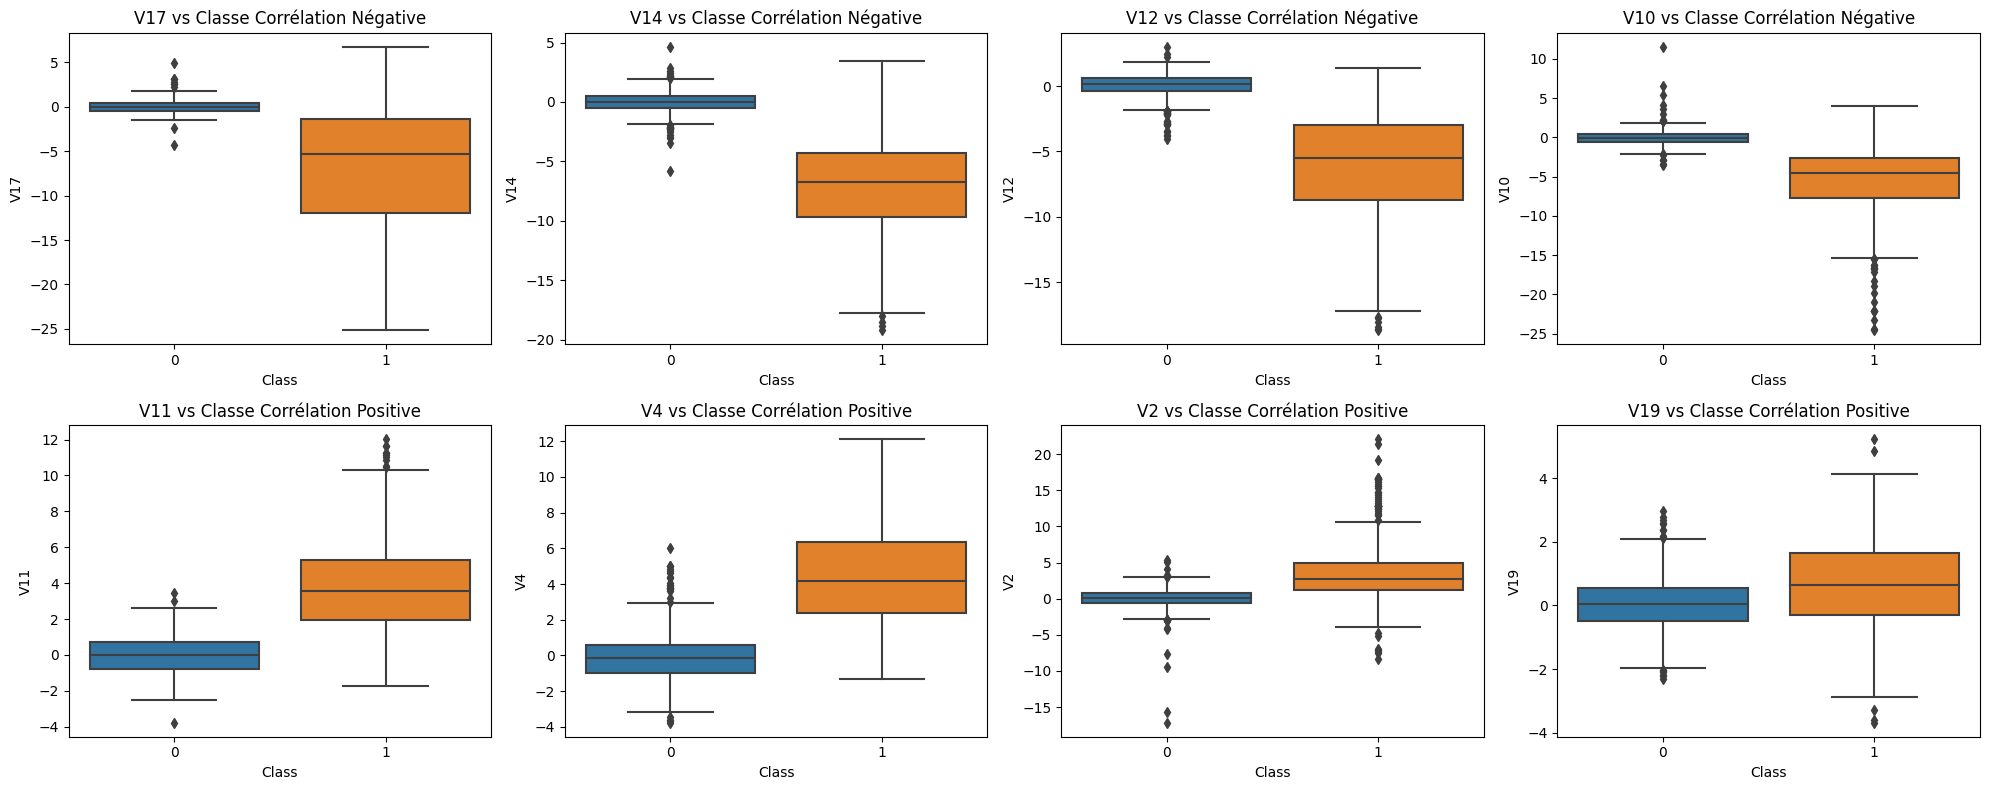

In [24]:
# visualiser les variables les plus corrélées avec la variable cible   
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8))

# fonction pour afficher les boxplots
def plot_boxplot(ax, data, x, y, title):
    sns.boxplot(x=x, y=y, data=data, ax=ax)
    ax.set_title(title)

# les corrélations négatives et positives
variables = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2', 'V19']
titles = ['V17 vs Classe Corrélation Négative', 'V14 vs Classe Corrélation Négative', 'V12 vs Classe Corrélation Négative', 'V10 vs Classe Corrélation Négative', 'V11 vs Classe Corrélation Positive', 'V4 vs Classe Corrélation Positive', 'V2 vs Classe Corrélation Positive', 'V19 vs Classe Corrélation Positive']

for ax, var, title in zip(axes.flatten(), variables, titles):
    plot_boxplot(ax, new_df, "Class", var, title)

# éviter le chevauchement des graphiques
plt.tight_layout()
# afficher les graphiques
plt.show()

### Détection d'anomalie
maintenant on veut eliminer les variables à forte corrélation avec nos classes

In [25]:
# Visualisation de distribution de 'V14', 'V12' et ' V10' pour les transactions frauduleuses 
# adjuster une distribution normale pour les variables V14, V12 et V10
from scipy.stats import norm

f, axes = plt.subplots(1, 3, figsize=(20, 6))

variables = ['V14', 'V12', 'V10']
colors = ['#FB8861', '#56F9BB', '#C5B3F9']

for ax, var, color in zip(axes, variables, colors):
    fraud_dist = new_df[var].loc[new_df['Class'] == 1].values
    sns.distplot(fraud_dist, ax=ax, fit=norm, color=color)
    ax.set_title(f'{var} Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

/tmp/ipykernel_43/3089449270.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_dist, ax=ax, fit=norm, color=color)
/tmp/ipykernel_43/3089449270.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud_dist, ax=ax, fit=norm, color=color)
/tmp/ipykernel_43/3089449270.py:12: UserWarning:

### Suppression des valeurs aberrantes

In [26]:
variables = ['V14', 'V12', 'V10']

# On parcourt chaque variable de la liste
for var in variables:
    # On extrait les valeurs de la variable pour les transactions frauduleuses
    donnees_fraude = new_df[var].loc[new_df['Class'] == 1].values
    
    # On calcule le premier quartile (25e percentile) et le troisième quartile (75e percentile) de ces valeurs
    q25, q75 = np.percentile(donnees_fraude, 25), np.percentile(donnees_fraude, 75)
    
    # On calcule l'écart interquartile (IQR), qui est la différence entre le troisième et le premier quartile
    iqr = q75 - q25

    # On définit un seuil, qui est 1.5 fois l'IQR. C'est une règle couramment utilisée pour identifier les valeurs aberrantes.
    seuil = iqr * 1.5
    
    # On calcule les limites inférieure et supérieure pour les valeurs non aberrantes
    inferieur, superieur = q25 - seuil, q75 + seuil

    # On identifie les valeurs aberrantes
    aberrantes = [x for x in donnees_fraude if x < inferieur or x > superieur]
    
    # On affiche le nombre de valeurs aberrantes et les valeurs aberrantes elles-mêmes
    print(f'Caractéristique {var} Aberrantes pour les cas de fraude : {len(aberrantes)}')
    print(f'{var} aberrantes : {aberrantes}')

    # On supprime les valeurs aberrantes du DataFrame
    new_df = new_df.drop(new_df[(new_df[var] > superieur) | (new_df[var] < inferieur)].index)
    
    # On affiche le nombre d'instances restantes dans le DataFrame après la suppression des valeurs aberrantes
    print(f'Nombre d\'instances après suppression des aberrantes : {len(new_df)}')
    
    # On affiche une ligne de séparation pour rendre les résultats plus lisibles
    print('----' * 44)

Caractéristique V14 Aberrantes pour les cas de fraude : 4
V14 aberrantes : [-18.0499976898594, -18.8220867423816, -18.4937733551053, -19.2143254902614]
Nombre d'instances après suppression des aberrantes : 979
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Caractéristique V12 Aberrantes pour les cas de fraude : 4
V12 aberrantes : [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
Nombre d'instances après suppression des aberrantes : 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Caractéristique V10 Aberrantes pour les cas de fraude : 27
V10 aberrantes : [-20.9491915543611, -17.1415136412892, -18.9132433348732, -14.9246547735487, -22.1870885620007, -22.1870885620007, -23.2282548357516, -14.924654773548

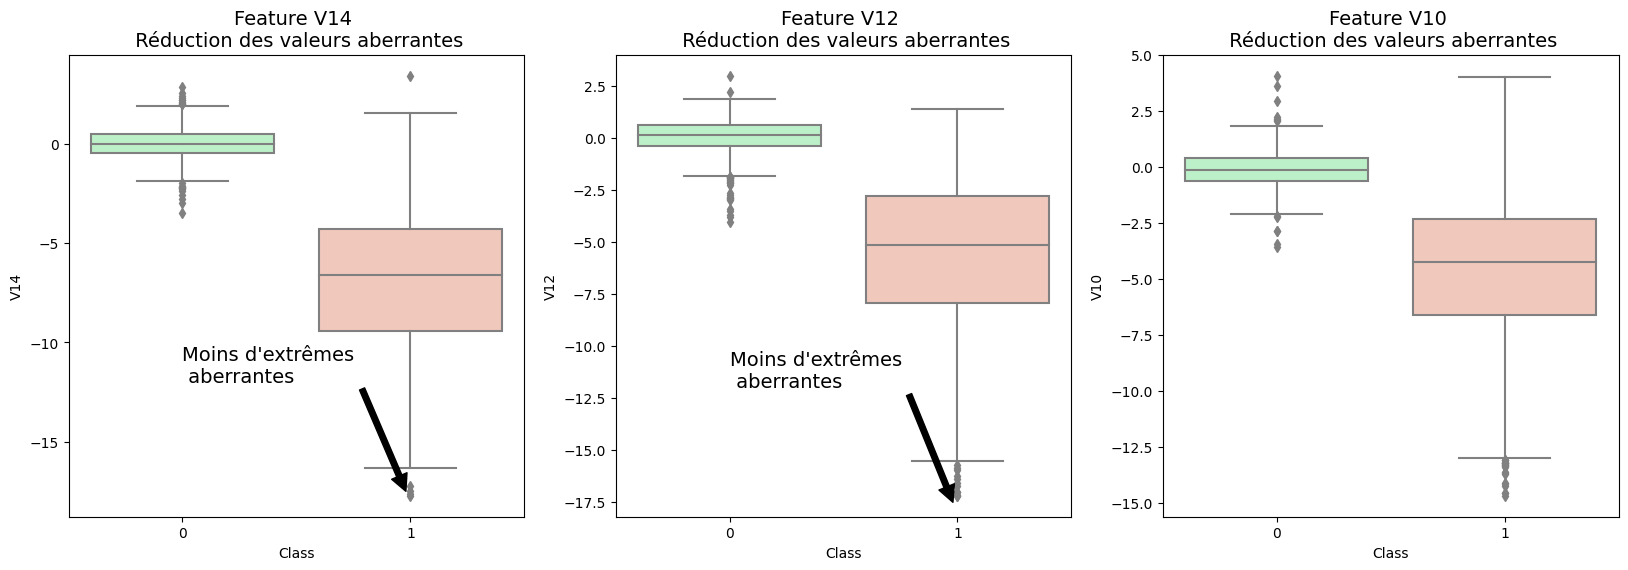

In [29]:
f, axes = plt.subplots(1, 3, figsize=(20,6))
couleurs = ['#B3F9C5', '#f9c5b3']
variables = ['V14', 'V12', 'V10']

for i, var in enumerate(variables):
    sns.boxplot(x="Class", y=var, data=new_df, ax=axes[i], palette=couleurs)
    axes[i].set_title(f"Feature {var} \n Réduction des valeurs aberrantes", fontsize=14)
    axes[i].annotate('Moins d\'extrêmes \n aberrantes', xy=(0.98, -17.5), xytext=(0, -12),
                arrowprops=dict(facecolor='black'),
                fontsize=14)

plt.show()

## VI- Selection de model
### Dans ce stade on va utiliser un mixte d'ensemble learning algorithm et simple classifiers puis comparer les résultats

In [30]:

from sklearn.model_selection import train_test_split

# Séparation des caractéristiques et de la cible
X = df.drop('Class', axis=1)
y = df['Class']

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# transformer X et y en tableaux numpy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
        

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "XGBoost": XGBClassifier()
}

In [32]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classificateur: ", classifier.__class__.__name__, "a un score d'entraînement de", training_score.mean() * 100, "% de précision")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classificateur:  LogisticRegression a un score d'entraînement de 99.92676713452853 % de précision
Classificateur:  RandomForestClassifier a un score d'entraînement de 99.95686283887137 % de précision
Classificateur:  SVC a un score d'entraînement de 99.83848639172551 % de précision
Classificateur:  XGBClassifier a un score d'entraînement de 99.96238036957146 % de précision


# VII - Hyperparameter tuning

### Cette partie nécessite d'énorme CPU et RAM et malheureusement ne s'execute pas, mais son role et d'ameliorer d'avantage la performance des modeles en iterant sur differentes parametrages

In [ ]:
from sklearn.model_selection import GridSearchCV
# Définir les modèles et leurs paramètres respectifs
parametres_modeles = {
    LogisticRegression(): {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
    RandomForestClassifier(): {"n_estimators": [100, 200, 500], "max_depth": [None, 10, 20, 30], "min_samples_leaf": [1, 2, 4]},
    SVC(): {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
    XGBClassifier(): {"n_estimators": [100, 200, 500], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 5, 7, 9]}
}

# Dictionnaire pour stocker les meilleurs estimateurs
meilleurs_estimateurs = {}

# Boucle sur les modèles et les paramètres pour effectuer la recherche de grille
for modele, parametres in parametres_modeles.items():
    grille = GridSearchCV(modele, parametres)
    grille.fit(X_train, y_train)
    meilleurs_estimateurs[modele.__class__.__name__] = grille.best_estimator_
    
'''from sklearn.model_selection import GridSearchCV

parametres_modeles = {
    LogisticRegression(solver='liblinear'): {"penalty": ['l1', 'l2'], 'C': [0.1, 1, 10]},
    RandomForestClassifier(): {"n_estimators": [100, 200], "max_depth": [10, 20], "min_samples_leaf": [1, 2]},
    SVC(kernel='linear'): {'C': [0.5, 1]},
    XGBClassifier(): {"n_estimators": [100, 200], "learning_rate": [0.1, 0.2], "max_depth": [3, 5]}
}

# stocker les meilleures estimateurs
meilleurs_estimateurs = {}

# boucler sur les parametres
for modele, parametres in parametres_modeles.items():
    grille = GridSearchCV(modele, parametres, n_jobs=-1, cv=3) 
    grille.fit(X_train, y_train)
    meilleurs_estimateurs[modele.__class__.__name__] = grille.best_estimator_'''

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [36]:
# vérifier pour le cas de overfitting
for key, classifier in meilleurs_estimateurs.items():
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classificateur: ", classifier.__class__.__name__, "a un score d'entraînement de", training_score.mean() * 100, "% de précision")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classificateur:  LogisticRegression a un score d'entraînement de 99.92827189961757 % de précision


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# VIII - Evaluation du model

In [39]:
# Evaluation des modeles via differents metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

performance_dict = {}

for key, estimator in meilleurs_estimateurs.items():
    y_pred = estimator.predict(X_test)
    performance_dict[key] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC-AUC Score': roc_auc_score(y_test, y_pred)
    }


for model, performance in performance_dict.items():
    print(f"Performance of {model}:")
    for metric, score in performance.items():
        print(f"{metric}: {score:.4f}")


Performance of LogisticRegression:
Accuracy: 0.9990
Precision: 0.8707
Recall: 0.5941
F1 Score: 0.7063
ROC-AUC Score: 0.7970


# Conclusion et Recommandations


### En conclusion, le modèle random forest offre une performance adéquate pour la détection des fraudes par carte de crédit            Dans notre notebook on remarque le display de logistic regression (model plus simple a traiter par la machine et qui offre aussi de tres bonnes résultats). Il est quand meme important de noter qu'explorer la methode de over-sampling sera une continuation intressante de l'étude. L'analyse des caractéristiques les plus influentes et l'ingénierie des caractéristiques pourraient également contribuer à améliorer les performances du modèle.
        